In [55]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
%matplotlib inline

In [56]:
base_data = pd.read_excel('/content/customer_churn_large_dataset.xlsx')

In [57]:
base_data.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [58]:
base_data.shape

(100000, 9)

In [59]:
base_data.columns.values

array(['CustomerID', 'Name', 'Age', 'Gender', 'Location',
       'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB',
       'Churn'], dtype=object)

In [60]:
base_data.dtypes

CustomerID                      int64
Name                           object
Age                             int64
Gender                         object
Location                       object
Subscription_Length_Months      int64
Monthly_Bill                  float64
Total_Usage_GB                  int64
Churn                           int64
dtype: object

In [61]:
base_data.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


Text(0.5, 1.02, 'Count of Target Variable per Category')

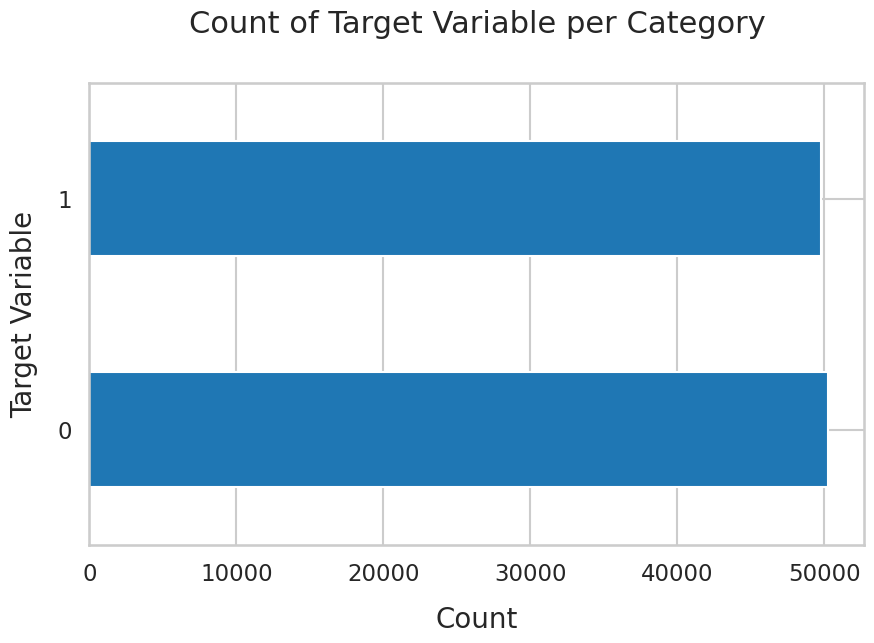

In [62]:
#Churner's Ratio
base_data['Churn'].value_counts().plot(kind='barh', figsize=(10 , 6) )
plt.xlabel("Count",labelpad=14)
plt.ylabel("Target Variable",labelpad=14)
plt.title("Count of Target Variable per Category", y=1.02)

In [63]:
100*base_data['Churn'].value_counts()/len(base_data['Churn'])
#Almost Equal

0    50.221
1    49.779
Name: Churn, dtype: float64

In [64]:
base_data['Churn'].value_counts()

0    50221
1    49779
Name: Churn, dtype: int64

In [65]:
base_data.info(verbose= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


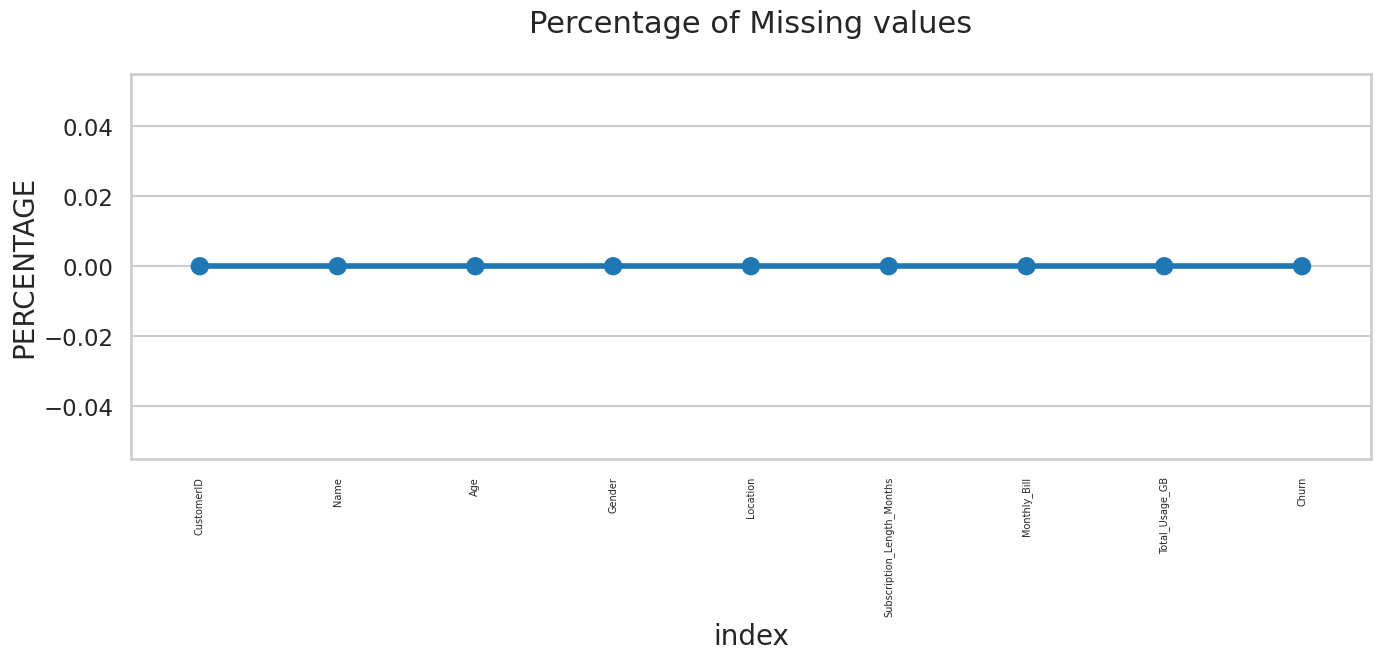

In [66]:
missing = pd.DataFrame((base_data.isnull().sum())*100/base_data.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot(x ='index',y = 0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

In [67]:
base_data.isnull().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

In [68]:
print(base_data['Subscription_Length_Months'].max())

24


In [69]:
labels = ["{0} - {1}".format(i,i+11) for i in range(1,base_data['Subscription_Length_Months'].max(),12)]
base_data['tenure_group'] = pd.cut(base_data.Subscription_Length_Months,range(1,30,12),right = False,labels=labels)

In [70]:
base_data['tenure_group'].value_counts()

1 - 12     50021
13 - 24    49979
Name: tenure_group, dtype: int64

In [71]:
base_data['Total_Charges'] = base_data['Monthly_Bill'] * base_data['Subscription_Length_Months']

In [72]:
base_data.columns

Index(['CustomerID', 'Name', 'Age', 'Gender', 'Location',
       'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB', 'Churn',
       'tenure_group', 'Total_Charges'],
      dtype='object')

In [73]:
ch_data = base_data.copy()

In [74]:
ch_data.columns

Index(['CustomerID', 'Name', 'Age', 'Gender', 'Location',
       'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB', 'Churn',
       'tenure_group', 'Total_Charges'],
      dtype='object')

In [75]:
ch_data['Senior_Citizen'] = ch_data['Age'].apply(lambda age: 1 if age > 60 else 0)

In [76]:
labels = ["{0} - {1}".format(i, i+19) for i in range(1, base_data['Age'].max(), 20)]
bins = range(1, base_data['Age'].max() + 20, 20)  # Add 20 to include the upper boundary
ch_data['age_group'] = pd.cut(ch_data.Age, bins, right=False, labels=labels)

In [77]:
ch_data['Monthly_Usage_GB'] = ch_data['Total_Usage_GB']/ch_data['Subscription_Length_Months']

In [78]:
ch_data.drop(columns=['CustomerID','Name','Subscription_Length_Months','Age'],axis=1,inplace=True)

In [79]:
ch_data.head()

,Gender,Location,Monthly_Bill,Total_Usage_GB,Churn,tenure_group,Total_Charges,Senior_Citizen,age_group,Monthly_Usage_GB
0,Male,Los Angeles,73.36,236,0,13 - 24,1247.12,1,61 - 80,13.882353
1,Female,New York,48.76,172,0,1 - 12,48.76,1,61 - 80,172.000000
2,Female,Los Angeles,85.47,460,0,1 - 12,427.35,0,21 - 40,92.000000
3,Female,Miami,97.94,297,1,1 - 12,293.82,0,21 - 40,99.000000
4,Female,Miami,58.14,266,0,13 - 24,1104.66,0,41 - 60,14.000000


<Figure size 640x480 with 0 Axes>

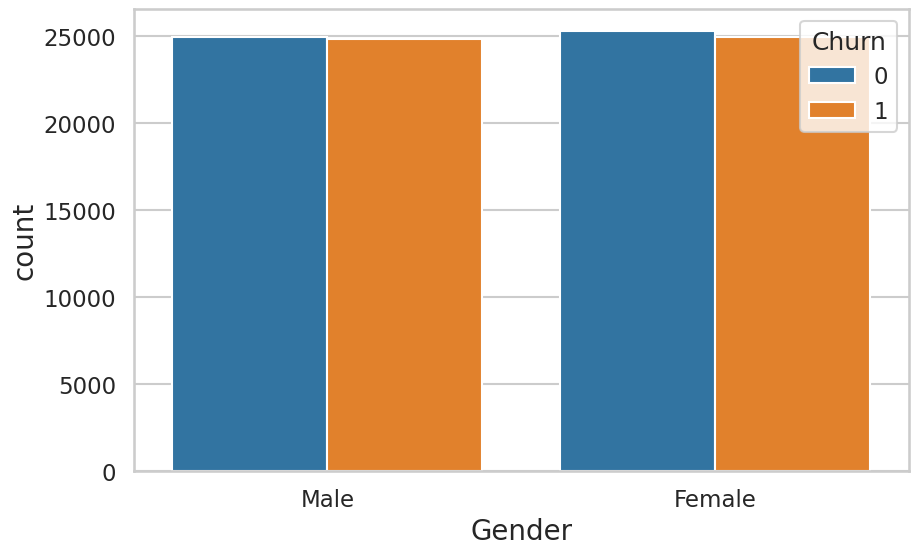

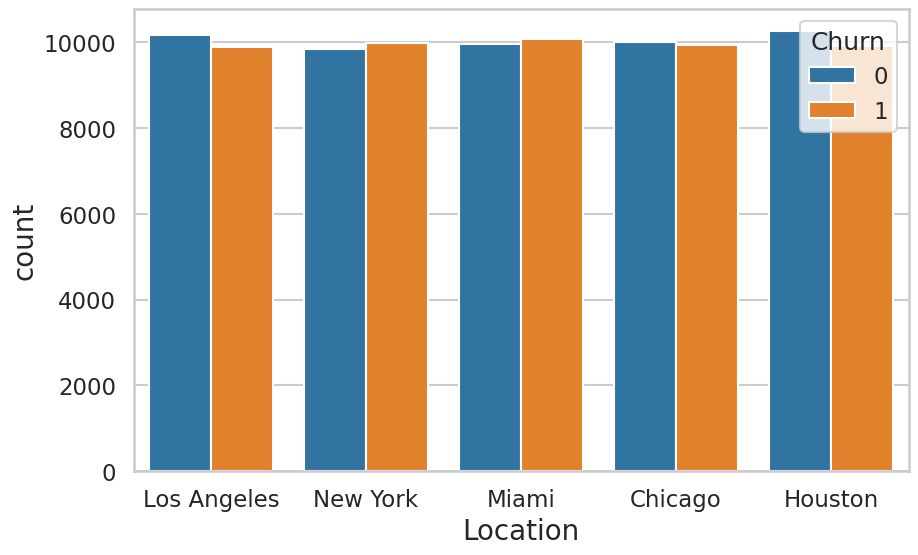

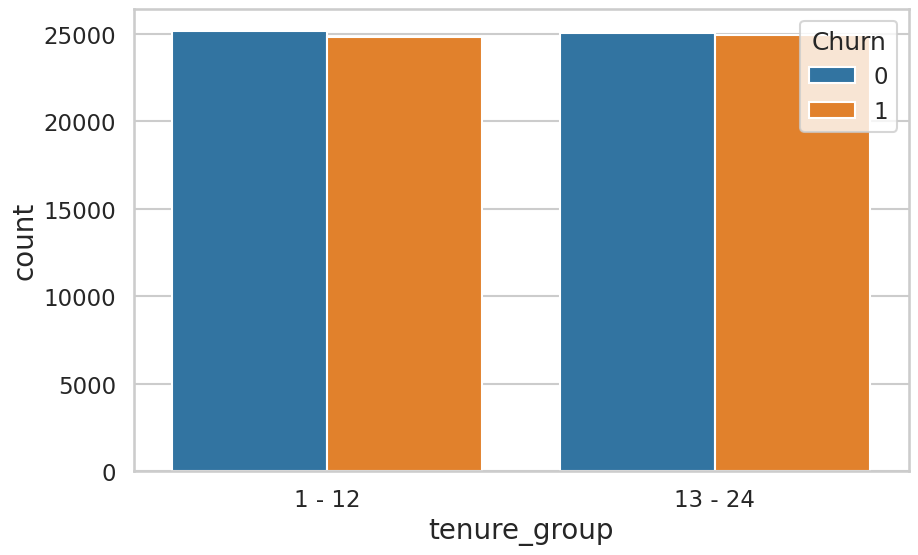

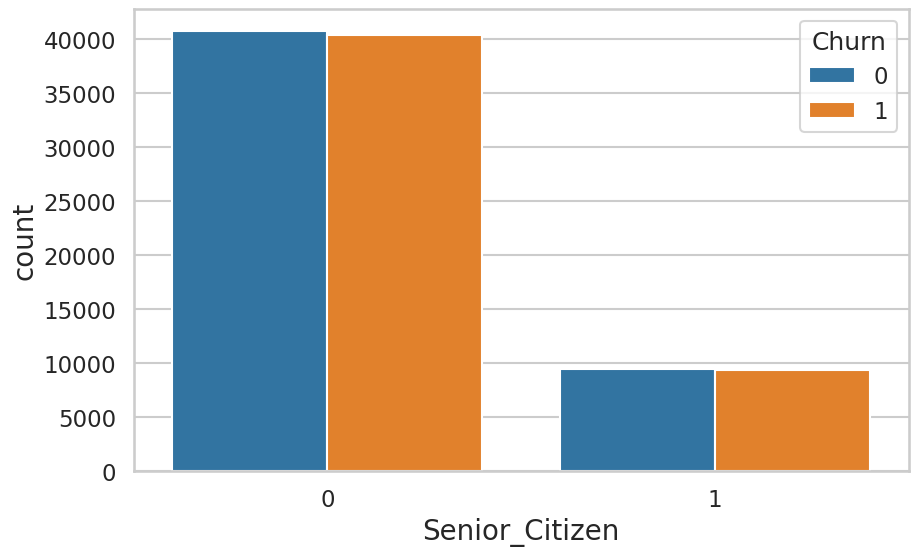

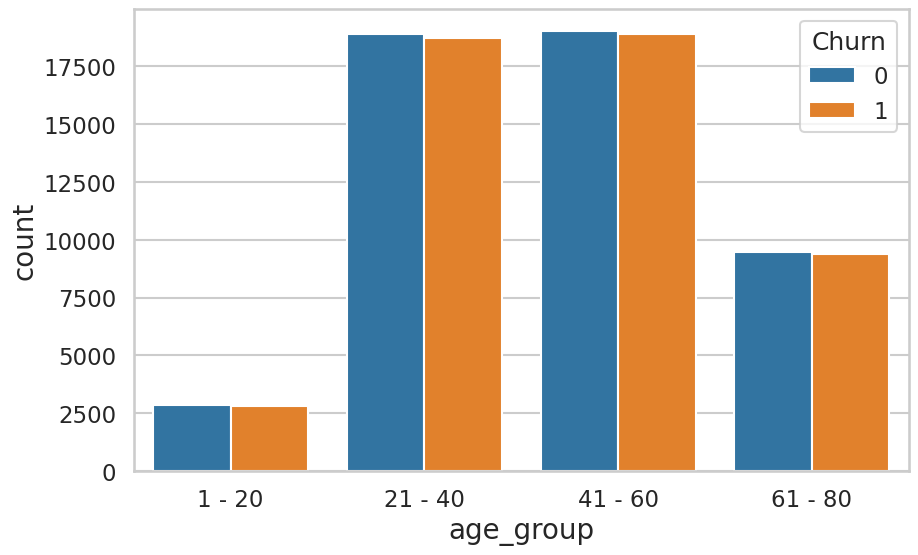

In [80]:
#Data Exploration
for i,predictor in enumerate(ch_data.drop(columns=['Churn','Monthly_Bill','Total_Charges','Total_Usage_GB','Monthly_Usage_GB'])):
  plt.figure(i)
  plt.figure(figsize=(10, 6))
  sns.countplot(data=ch_data,x=predictor,hue='Churn')

In [81]:
ch_data_dummies = pd.get_dummies(ch_data)
ch_data_dummies.head()

,Monthly_Bill,Total_Usage_GB,Churn,Total_Charges,Senior_Citizen,Monthly_Usage_GB,Gender_Female,Gender_Male,Location_Chicago,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York,tenure_group_1 - 12,tenure_group_13 - 24,age_group_1 - 20,age_group_21 - 40,age_group_41 - 60,age_group_61 - 80
0,73.36,236,0,1247.12,1,13.882353,0,1,0,0,1,0,0,0,1,0,0,0,1
1,48.76,172,0,48.76,1,172.000000,1,0,0,0,0,0,1,1,0,0,0,0,1
2,85.47,460,0,427.35,0,92.000000,1,0,0,0,1,0,0,1,0,0,1,0,0
3,97.94,297,1,293.82,0,99.000000,1,0,0,0,0,1,0,1,0,0,1,0,0
4,58.14,266,0,1104.66,0,14.000000,1,0,0,0,0,1,0,0,1,0,0,1,0


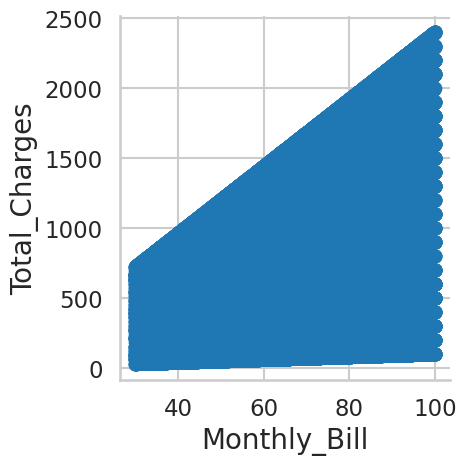

In [82]:
sns.lmplot(data=ch_data_dummies,x='Monthly_Bill',y='Total_Charges',fit_reg=False)

<ipython-input-83-d9b7b3ec3085>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(ch_data_dummies.Monthly_Bill[(ch_data_dummies["Churn"]==0) ], color='Red',shade=True)
<ipython-input-83-d9b7b3ec3085>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(ch_data_dummies.Monthly_Bill[(ch_data_dummies["Churn"]==1) ], color='Blue',shade=True)


Text(0.5, 1.0, 'Monthly charges by churn')

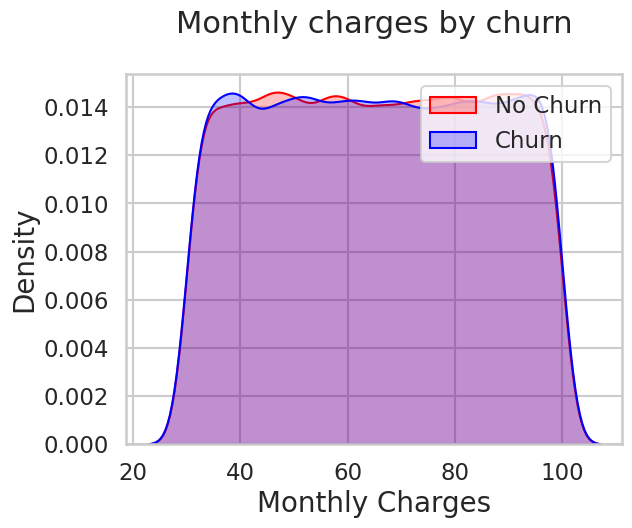

In [83]:
Mth = sns.kdeplot(ch_data_dummies.Monthly_Bill[(ch_data_dummies["Churn"]==0) ], color='Red',shade=True)
Mth = sns.kdeplot(ch_data_dummies.Monthly_Bill[(ch_data_dummies["Churn"]==1) ], color='Blue',shade=True)
Mth.legend(["No Churn","Churn"],loc = 'upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')


<ipython-input-84-67b768eff7a3>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(ch_data_dummies.Total_Charges[(ch_data_dummies["Churn"]==0) ], color='Red',shade=True)
<ipython-input-84-67b768eff7a3>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(ch_data_dummies.Total_Charges[(ch_data_dummies["Churn"]==1) ], color='Blue',shade=True)


Text(0.5, 1.0, 'Total charges by churn')

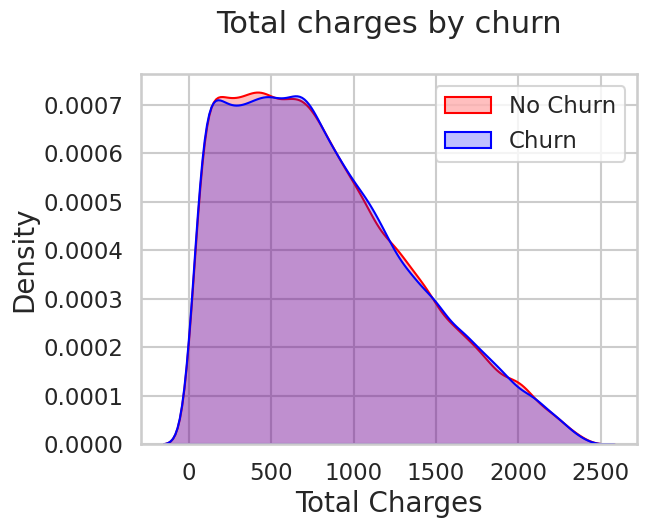

In [84]:
Mth = sns.kdeplot(ch_data_dummies.Total_Charges[(ch_data_dummies["Churn"]==0) ], color='Red',shade=True)
Mth = sns.kdeplot(ch_data_dummies.Total_Charges[(ch_data_dummies["Churn"]==1) ], color='Blue',shade=True)
Mth.legend(["No Churn","Churn"],loc = 'upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Total Charges')
Mth.set_title('Total charges by churn')

<ipython-input-85-4e6c80d69a55>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(ch_data_dummies.Monthly_Usage_GB[(ch_data_dummies["Churn"]==0) ], color='Red',shade=True)
<ipython-input-85-4e6c80d69a55>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(ch_data_dummies.Monthly_Usage_GB[(ch_data_dummies["Churn"]==1) ], color='Blue',shade=True)


Text(0.5, 1.0, 'Monthly Usage by churn')

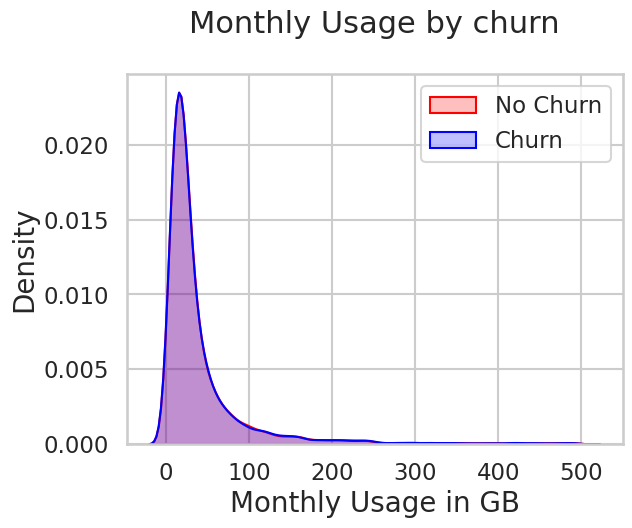

In [85]:
Mth = sns.kdeplot(ch_data_dummies.Monthly_Usage_GB[(ch_data_dummies["Churn"]==0) ], color='Red',shade=True)
Mth = sns.kdeplot(ch_data_dummies.Monthly_Usage_GB[(ch_data_dummies["Churn"]==1) ], color='Blue',shade=True)
Mth.legend(["No Churn","Churn"],loc = 'upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Usage in GB')
Mth.set_title('Monthly Usage by churn')

<ipython-input-86-b7004407c319>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(ch_data_dummies.Total_Usage_GB[(ch_data_dummies["Churn"]==0) ], color='Red',shade=True)
<ipython-input-86-b7004407c319>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(ch_data_dummies.Monthly_Usage_GB[(ch_data_dummies["Churn"]==1) ], color='Blue',shade=True)


Text(0.5, 1.0, 'Total Usage by churn')

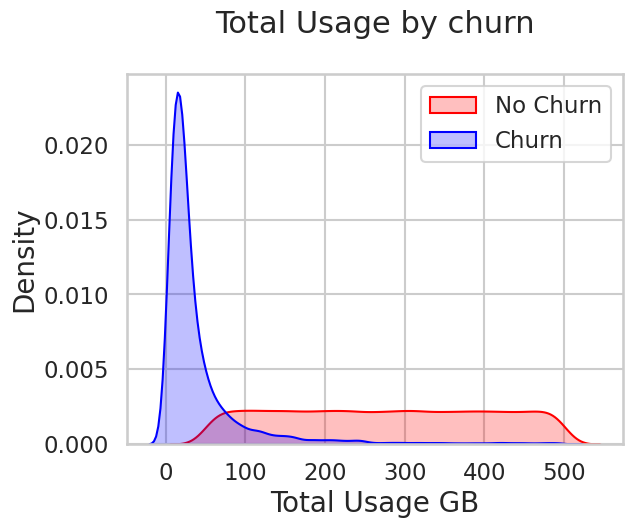

In [86]:
Mth = sns.kdeplot(ch_data_dummies.Total_Usage_GB[(ch_data_dummies["Churn"]==0) ], color='Red',shade=True)
Mth = sns.kdeplot(ch_data_dummies.Monthly_Usage_GB[(ch_data_dummies["Churn"]==1) ], color='Blue',shade=True)
Mth.legend(["No Churn","Churn"],loc = 'upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Total Usage GB')
Mth.set_title('Total Usage by churn')

<Axes: >

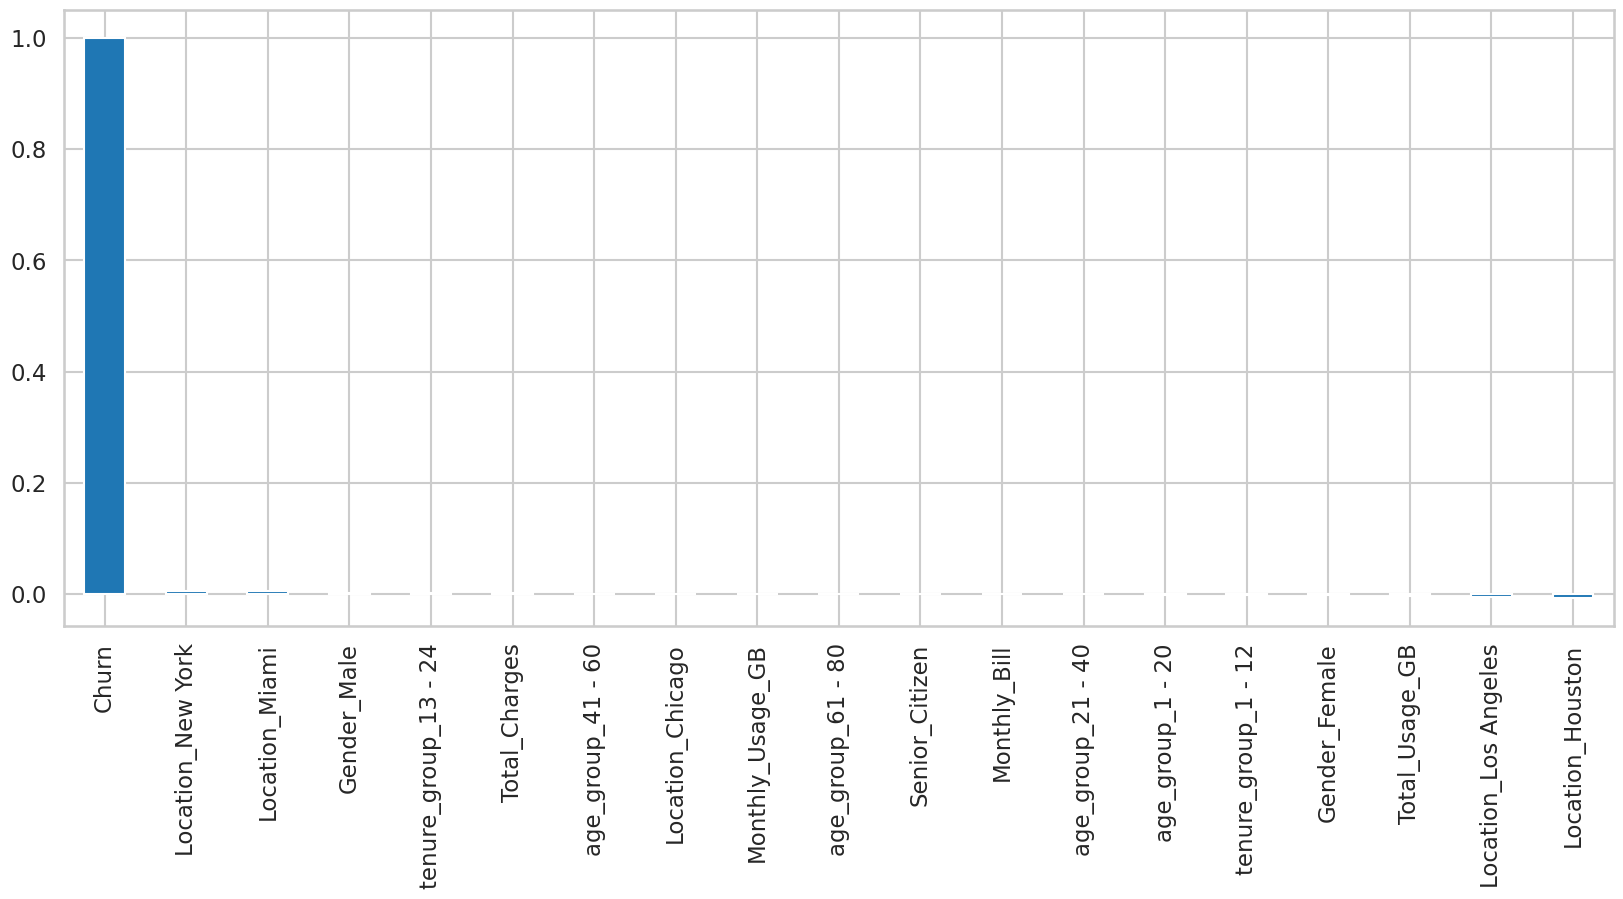

In [87]:

plt.figure(figsize=(20,8))
ch_data_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

<Axes: >

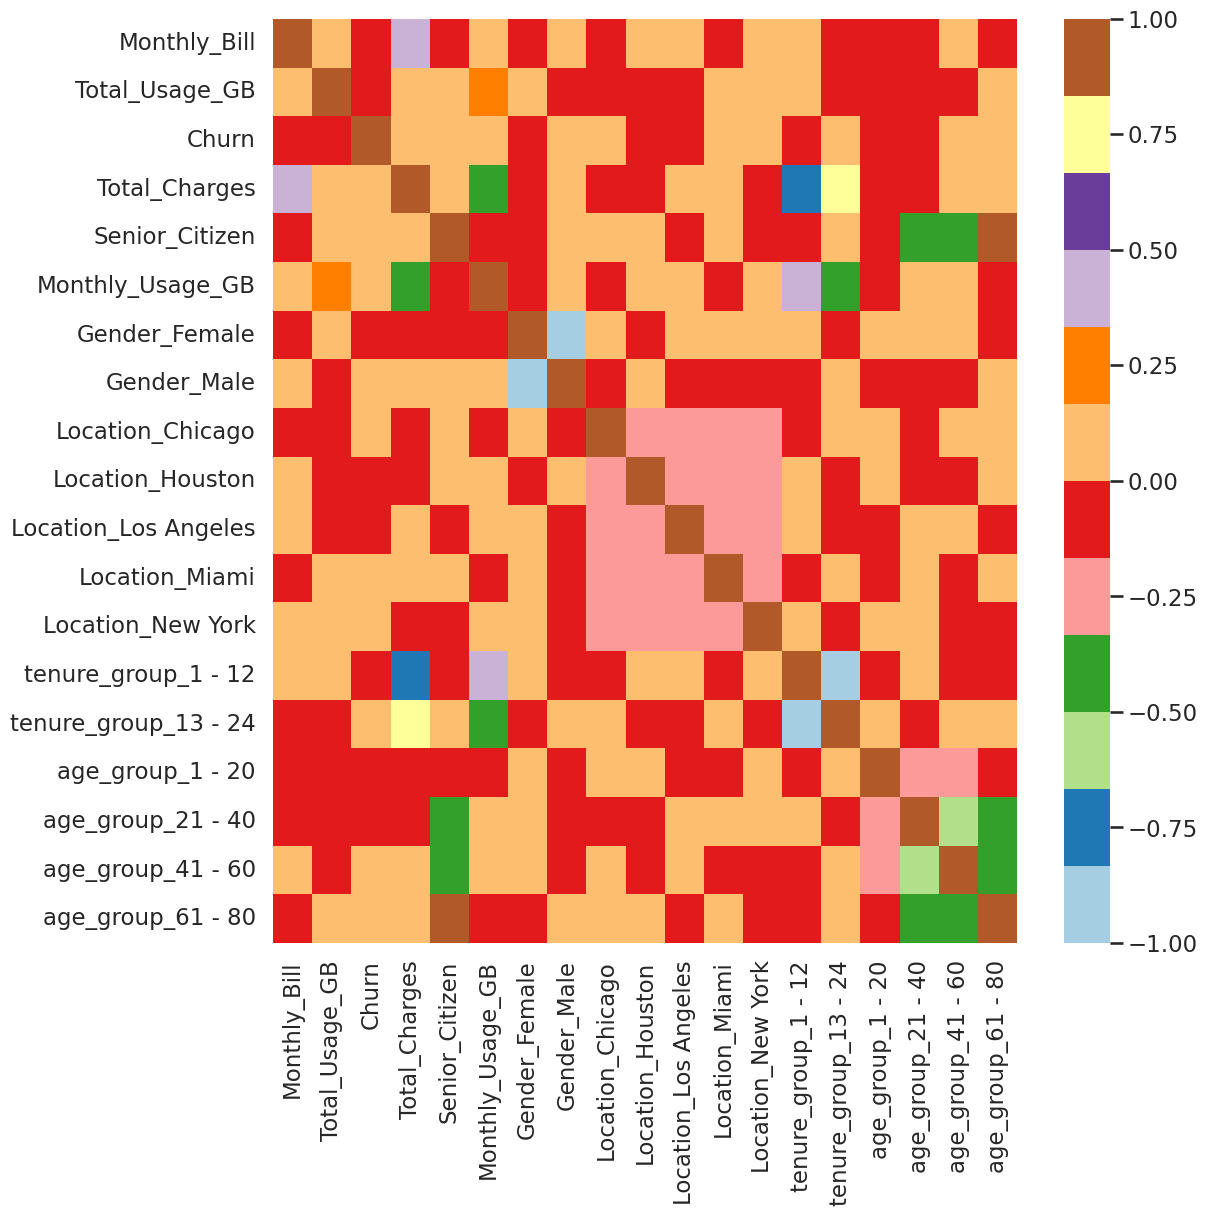

In [88]:
plt.figure(figsize=(12,12))
sns.heatmap(ch_data_dummies.corr(),cmap="Paired")

In [89]:
#Bivariate Analysis
df_Ch_0 = ch_data.loc[ch_data["Churn"] == 0]
df_Ch_1 = ch_data.loc[ch_data["Churn"] == 1]

In [90]:
def uniplot(df,col,title,hue =None):

    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30


    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright')

    plt.show()

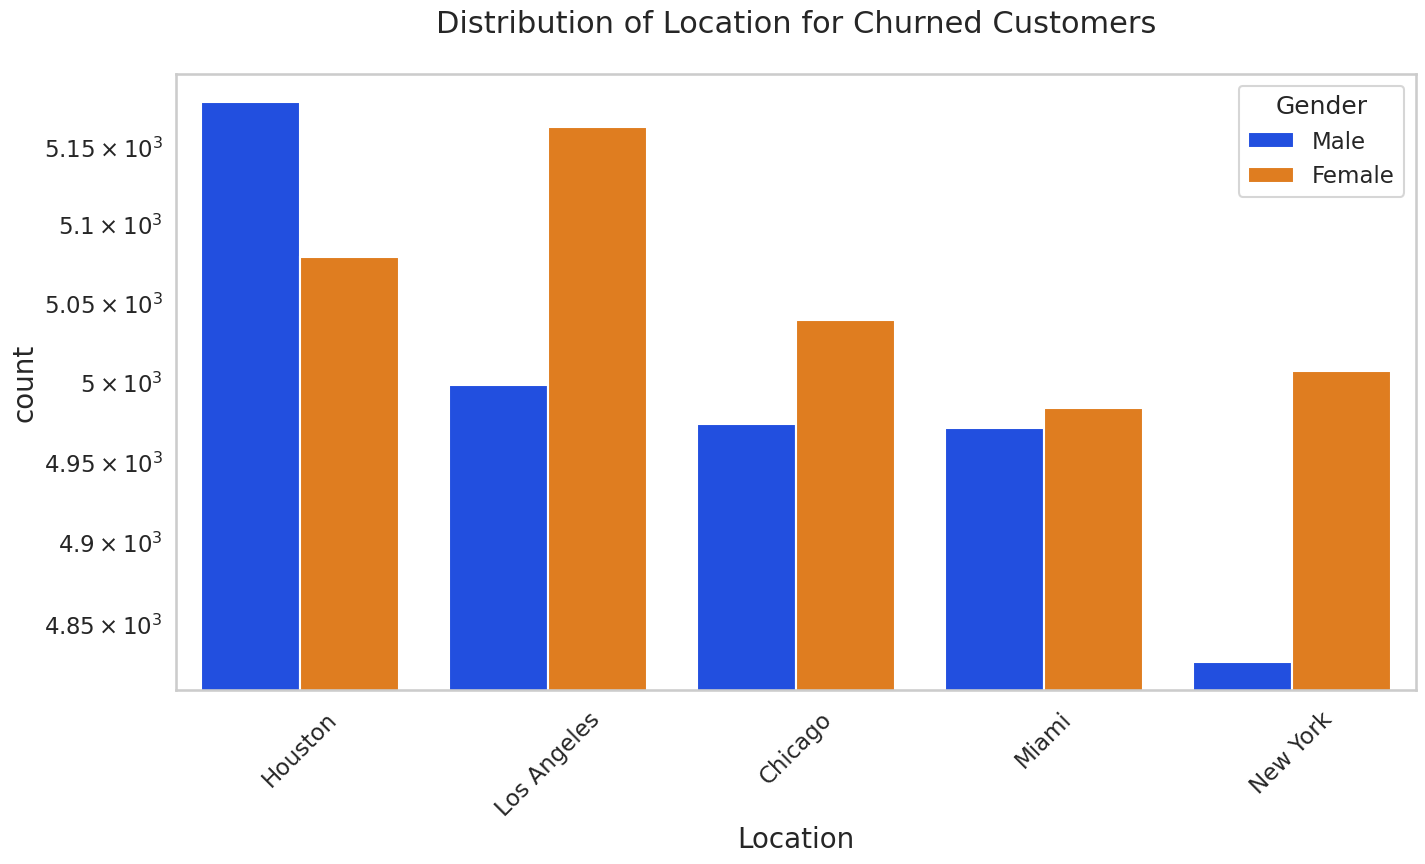

In [91]:
uniplot(df_Ch_0,col='Location',title="Distribution of Location for Churned Customers",hue= 'Gender')

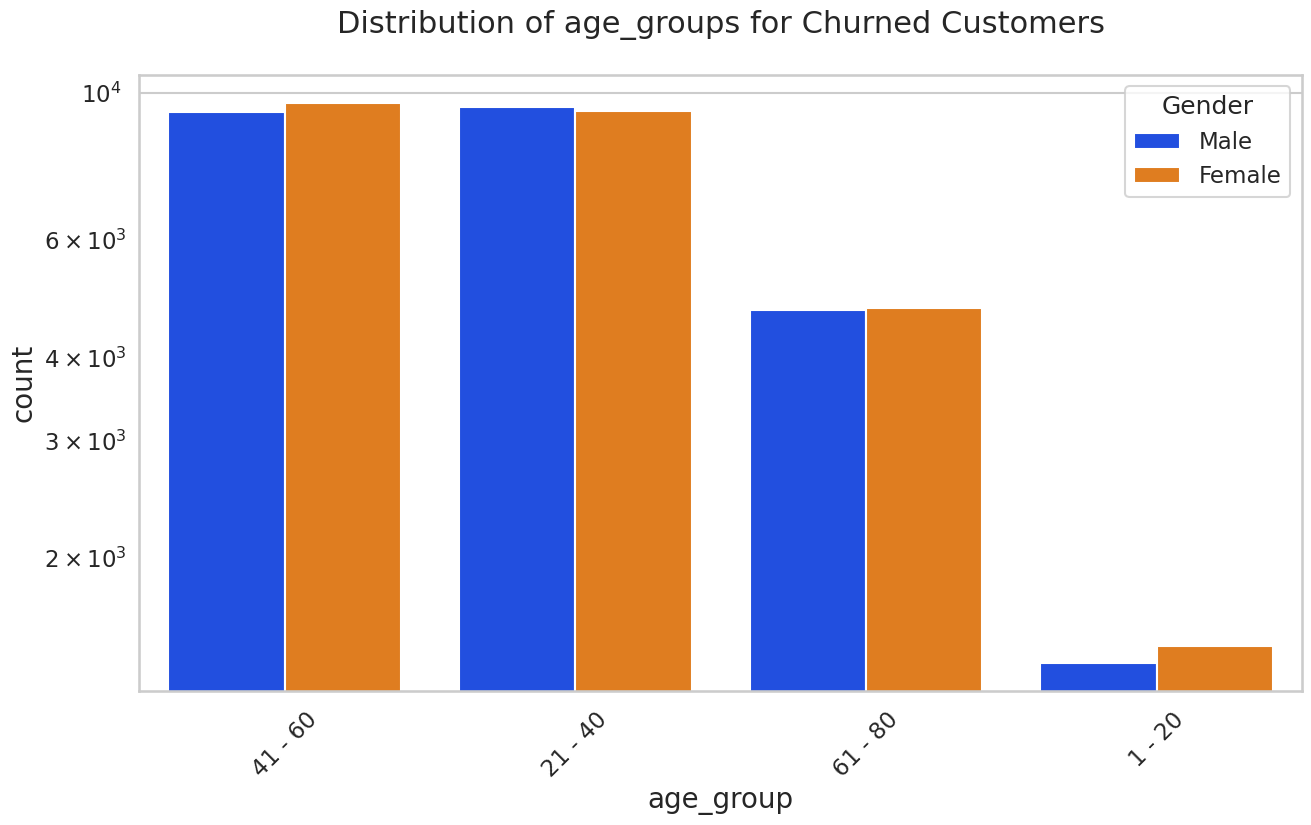

In [92]:
uniplot(df_Ch_0,col='age_group',title="Distribution of age_groups for Churned Customers",hue= 'Gender')

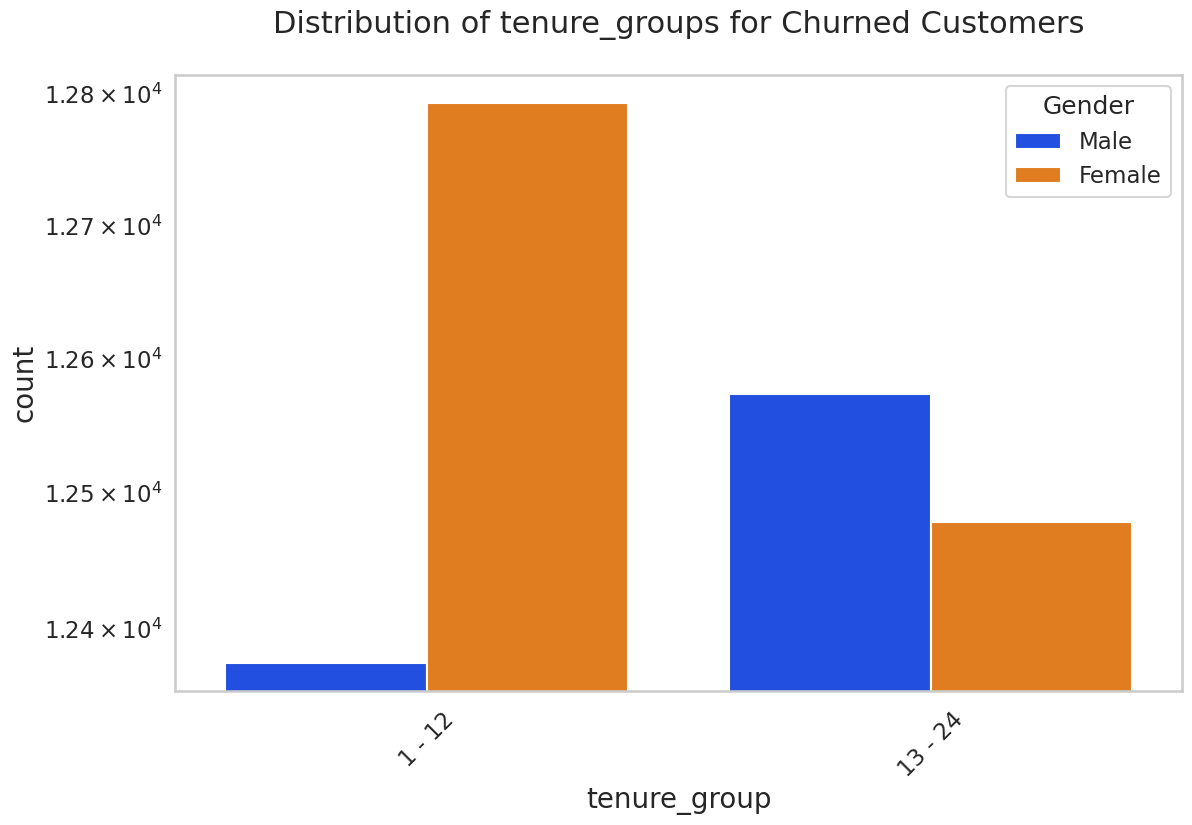

In [93]:
uniplot(df_Ch_0,col='tenure_group',title="Distribution of tenure_groups for Churned Customers",hue= 'Gender')

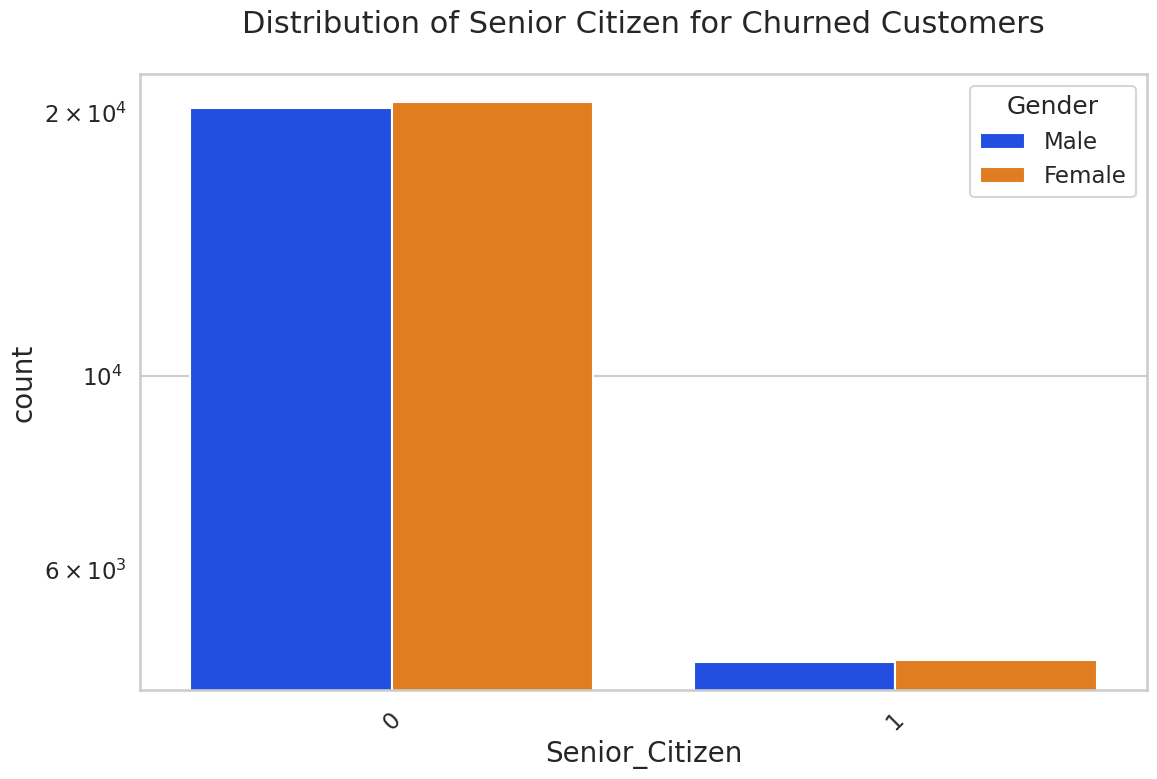

In [94]:
uniplot(df_Ch_0,col='Senior_Citizen',title="Distribution of Senior Citizen for Churned Customers",hue= 'Gender')

In [95]:
ch_data_dummies.to_csv('churn_data.csv')

In [96]:
ch_data_dummies.describe()

,Monthly_Bill,Total_Usage_GB,Churn,Total_Charges,Senior_Citizen,Monthly_Usage_GB,Gender_Female,Gender_Male,Location_Chicago,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York,tenure_group_1 - 12,tenure_group_13 - 24,age_group_1 - 20,age_group_21 - 40,age_group_41 - 60,age_group_61 - 80
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,65.053197,274.393650,0.497790,811.779157,0.188150,43.349682,0.502160,0.497840,0.199580,0.201570,0.200410,0.200310,0.198130,0.500210,0.499790,0.056660,0.376210,0.378980,0.188150
std,20.230696,130.463063,0.499998,533.858809,0.390834,65.786483,0.499998,0.499998,0.399687,0.401175,0.400309,0.400234,0.398593,0.500002,0.500002,0.231193,0.484436,0.485136,0.390834
min,30.000000,50.000000,0.000000,30.060000,0.000000,2.083333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.540000,161.000000,0.000000,378.240000,0.000000,12.687500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,65.010000,274.000000,0.000000,726.340000,0.000000,21.909091,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,82.640000,387.000000,1.000000,1161.862500,0.000000,42.545455,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,100.000000,500.000000,1.000000,2399.520000,1.000000,500.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
